# Imports

In [645]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Pré-teste e Pós-teste

In [646]:
data_path = Path('data')
experimento = pd.read_excel(data_path / 'experimento.xlsx', sheet_name='amostragem')
pre_teste_df = pd.read_excel(data_path / 'Formulário Pré-teste de Conhencimento (respostas) (1).xlsx')
# pre_teste_df.head(2)

In [647]:
pos_teste_df = pd.read_excel(data_path / 'Formulário Pós-teste de Conhencimento (respostas) (1).xlsx')
# pos_teste_df.head(2)

In [648]:
caracterizacao = pd.read_excel(data_path / 'Formulário de Recrutamento e Caracterização dos Participantes (respostas).xlsx')
# caracterizacao.head()

In [649]:
len(caracterizacao)

41

In [650]:
caracterizacao['Como você autoavalia seu nível de conhecimento em desenvolvimento de sistemas para web?'].value_counts()

Como você autoavalia seu nível de conhecimento em desenvolvimento de sistemas para web?
Eu participei de exercícios práticos em sala de aula.                       17
Eu tive aulas sobre isso.                                                    9
Eu não tenho familiaridade prévia com isso.                                  7
Eu apliquei isso em um projeto industrial.                                   5
Eu realizei pesquisas prévias em fontes da literatura e recursos online.     3
Name: count, dtype: int64

In [651]:
caracterizacao['Como você autoavalia seu nível de conhecimento em segurança de software (ou informação)?'].value_counts()

Como você autoavalia seu nível de conhecimento em segurança de software (ou informação)?
Eu tive aulas sobre isso.                                                   25
Eu participei de exercícios práticos em sala de aula.                       11
Eu realizei pesquisas prévias em fontes da literatura e recursos online.     3
Eu não tenho familiaridade prévia com isso.                                  1
Eu apliquei isso em um projeto industrial.                                   1
Name: count, dtype: int64

In [652]:
def question_map(x):
    if x in ['Eu tive aulas sobre isso.', 'Eu participei de exercícios práticos em sala de aula.', 'Eu realizei pesquisas prévias em fontes da literatura e recursos online.']:
        return 'Medium'
    elif x in ['Eu não tenho familiaridade prévia com isso.']:
        return 'Low'
    else:
        return 'High'

In [653]:
caracterizacao['Como você autoavalia seu nível de conhecimento em vulnerabilidades de segurança para sistemas web?'].value_counts()

Como você autoavalia seu nível de conhecimento em vulnerabilidades de segurança para sistemas web?
Eu tive aulas sobre isso.                                                   24
Eu participei de exercícios práticos em sala de aula.                        6
Eu realizei pesquisas prévias em fontes da literatura e recursos online.     5
Eu não tenho familiaridade prévia com isso.                                  5
Eu apliquei isso em um projeto industrial.                                   1
Name: count, dtype: int64

In [654]:
caracterizacao['Como você autoavalia seu nível de conhecimento em padrões de segurança para mitigar vulnerabilidades em sistemas web?'].value_counts()

Como você autoavalia seu nível de conhecimento em padrões de segurança para mitigar vulnerabilidades em sistemas web?
Eu tive aulas sobre isso.                                                   21
Eu realizei pesquisas prévias em fontes da literatura e recursos online.     8
Eu não tenho familiaridade prévia com isso.                                  7
Eu participei de exercícios práticos em sala de aula.                        5
Name: count, dtype: int64

In [655]:
def get_acertos(df):
    df = df.copy()
    c = ['Carimbo de data/hora', 'Qual o seu nome?', 'Qual o seu e-mail?']
    c.extend([f'Q{i}' for i in range(1, 13)])

    df.columns = c

    def acertou_q1(row):
        return row['Q1'] == 'Um ataque de injection ocorre quando um sistema permite que dados maliciosos sejam injetados em entradas não validadas, como formulários. Sistemas que validam e sanitizam entradas corretamente podem impedir que esses ataques sejam bem-sucedidos, protegendo a integridade dos dados e do sistema.'

    def acertou_q2(row):
        return row['Q2'] == 'Vazamento de dados sensíveis, como senhas e informações pessoais.'

    def acertou_q3(row):
        return row['Q3'] == '1 → A, 2 → B, 3 → C, 4 → D'

    def acertou_q4(row):
        return row['Q4'] == 'Implementação de Políticas de Privilégio Mínimo e Access Control'

    def acertou_q5(row):
        return row['Q5'] == 'Validação de entrada do usuário apenas no frontend antes de enviar os dados ao servidor.'

    def acertou_q6(row):
        return row['Q6'] == 'Permitem identificar atividades suspeitas e responder rapidamente a incidentes.'

    def acertou_q7(row):
        return row['Q7'] == 'Usar um algoritmo de hash forte, como bcrypt, Argon2 ou PBKDF2, com um salt único para cada senha.'

    def acertou_q8(row):
        return row['Q8'] == 'Implementação de controle de acesso no frontend sem reforço no backend.'

    def acertou_q9(row):
        return row['Q9'] == 'Implementar criptografia robusta de dados sensíveis, como números de cartão de crédito, e usar autenticação multifatorial para acesso administrativo.'

    def acertou_q10(row):
        return row['Q10'] == 'Implementar assinaturas digitais no código-fonte e usar um sistema de controle de versões que registre todas as alterações, com auditoria rigorosa.'

    def acertou_q11(row):
        return row['Q11'] == 'Broken Access Control'

    def acertou_q12(row):
        return row['Q12'] == 'Manipulação de código ou dados (exploiting software integrity)'

    df['acertou_q1'] = df.apply(acertou_q1, axis=1)
    df['acertou_q2'] = df.apply(acertou_q2, axis=1)
    df['acertou_q3'] = df.apply(acertou_q3, axis=1)
    df['acertou_q4'] = df.apply(acertou_q4, axis=1)
    df['acertou_q5'] = df.apply(acertou_q5, axis=1)
    df['acertou_q6'] = df.apply(acertou_q6, axis=1)
    df['acertou_q7'] = df.apply(acertou_q7, axis=1)
    df['acertou_q8'] = df.apply(acertou_q8, axis=1)
    df['acertou_q9'] = df.apply(acertou_q9, axis=1)
    df['acertou_q10'] = df.apply(acertou_q10, axis=1)
    df['acertou_q11'] = df.apply(acertou_q11, axis=1)
    df['acertou_q12'] = df.apply(acertou_q12, axis=1)

    acertos_colunas = [f'acertou_q{i}' for i in range(1, 13)]
    df['acertos'] = df[acertos_colunas].sum(axis=1)
    results = df[['Qual o seu nome?','Qual o seu e-mail?', 'acertos']].copy()
    results.columns = ['Nome', 'E-mail', 'Acertos']

    return results

In [656]:
acertos_pos = get_acertos(pos_teste_df)
# acertos_pos

In [657]:
#participantes do pre-teste que estão no pos-teste
mesmos_participantes = pre_teste_df[pre_teste_df["Qual o seu e-mail?"].isin(pos_teste_df["Qual o seu e-mail?"])].copy()
# mesmos_participantes.head(2)

In [658]:
acertos_pre = get_acertos(mesmos_participantes)
# acertos_pre

In [659]:
juntos = pd.merge(acertos_pre, acertos_pos[['E-mail', 'Acertos']], on='E-mail', suffixes=('_pos_aula', '_pos_jogo'))
# juntos

### Verificando a normalidade

In [660]:
juntos["Diferenca"] = juntos["Acertos_pos_jogo"] - juntos["Acertos_pos_aula"]

#teste de normalidade
shapiro_test = stats.shapiro(juntos["Diferenca"])
print(f"Shapiro-Wilk p-valor: {shapiro_test.pvalue:.4f}")

if shapiro_test.pvalue > 0.05:
    print("As diferenças seguem uma distribuição aproximadamente normal. Podemos usar o teste t pareado.")
else:
    print("As diferenças não seguem uma distribuição normal.")

Shapiro-Wilk p-valor: 0.2180
As diferenças seguem uma distribuição aproximadamente normal. Podemos usar o teste t pareado.


In [661]:
juntos["Diferenca"]

0     1
1     2
2     2
3     0
4     0
5     1
6    -2
7    -1
8    -1
9     0
10    2
11    0
12    1
13    0
14   -1
15    1
Name: Diferenca, dtype: int64

In [662]:
juntos['Diferenca'].values

array([ 1,  2,  2,  0,  0,  1, -2, -1, -1,  0,  2,  0,  1,  0, -1,  1])

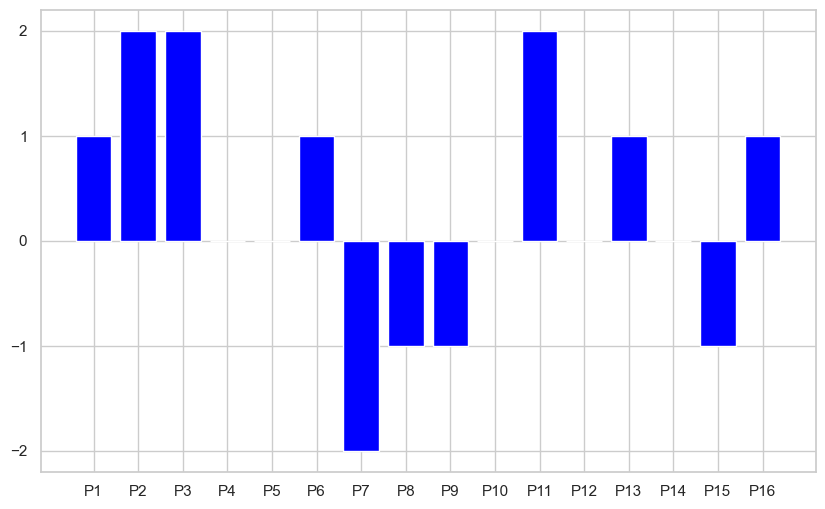

In [663]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x=[f"P{i}" for i in range(1, 17)], height=juntos['Diferenca'].values, color='blue')
# ax.set_xticks(ticks=np.arange(0, len(juntos['Diferenca'])), labels=[f"P{i}" for i in range(1, 17)])
ax.set_yticks(ticks=[-2, -1, 0, 1, 2])
# sns.despine(left=True)
plt.show()

In [664]:
print("Numero de participantes:", len(juntos))
print("Numero de participantes que acertaram mais no jogo:", len(juntos[juntos["Diferenca"] > 0]))
print("Numero de participantes que acertaram mais na aula:", len(juntos[juntos["Diferenca"] < 0]))
print("Numero de participantes que acertaram o mesmo número de perguntas:", len(juntos[juntos["Diferenca"] == 0]))

Numero de participantes: 16
Numero de participantes que acertaram mais no jogo: 7
Numero de participantes que acertaram mais na aula: 4
Numero de participantes que acertaram o mesmo número de perguntas: 5


### Análise de IRA

In [665]:
# juntos.head()

In [666]:
juntos['Nome'] = juntos["Nome"].str.lower().str.strip()
juntos = juntos.sort_values(by='Nome')
fix_names = {
    "caua de sousa brandão": "cauã de sousa brandão",
    "emanuel avila cruz pires": "emanuel ávila cruz pires"
}


juntos['Nome'] = juntos['Nome'].replace(fix_names)
# juntos

In [667]:
experimento_exp = experimento[experimento['Grupo'] == 'Experimental'].copy()
experimento_exp['Nome'] = experimento_exp['Nome'].str.lower().str.strip()
experimento_exp = experimento_exp.sort_values(by='Nome')
# experimento_exp

In [668]:
juntos = juntos.merge(experimento_exp[['Nome', 'Curso', 'Nota do IRA Individual', 'Faixa IRA']], how='left', on='Nome')
# juntos = juntos.drop(["Nome", "E-mail"], axis=1)
# juntos

#### Verificando diferenças por ira

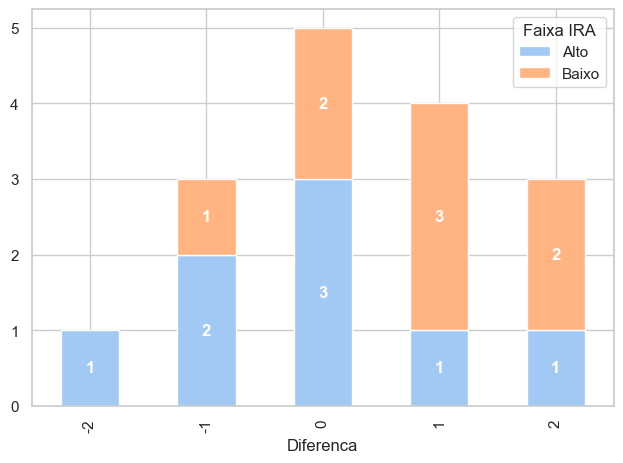

In [669]:
ax = pd.crosstab(index=juntos['Diferenca'], columns=juntos["Faixa IRA"]).plot(kind='bar', stacked=True)

# Adicionando os rótulos
for container in ax.containers:
    # Adiciona rótulo apenas se o valor for maior que 0
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                        ha='center', va='center', fontsize=12, color='white', weight='bold')

plt.tight_layout()
plt.show()

- uma pessoa com ira alto diminuiu a pontuação em 2;
- duas pessoas com ira alto e uma com ira baixo diminuiram a pontuação em 1;
- 3 das 4 pessoas que aumentaram a pontuação em 1 tinham ira baixo, indicando que o jogo ajudou pessoas com ira baixo;
- o mesmo acontece com pessoa que aumentaram a pontuação em 2, com 2 das 3 pessoas tendo ira baixo.

#### Verificando diferenças por Curso

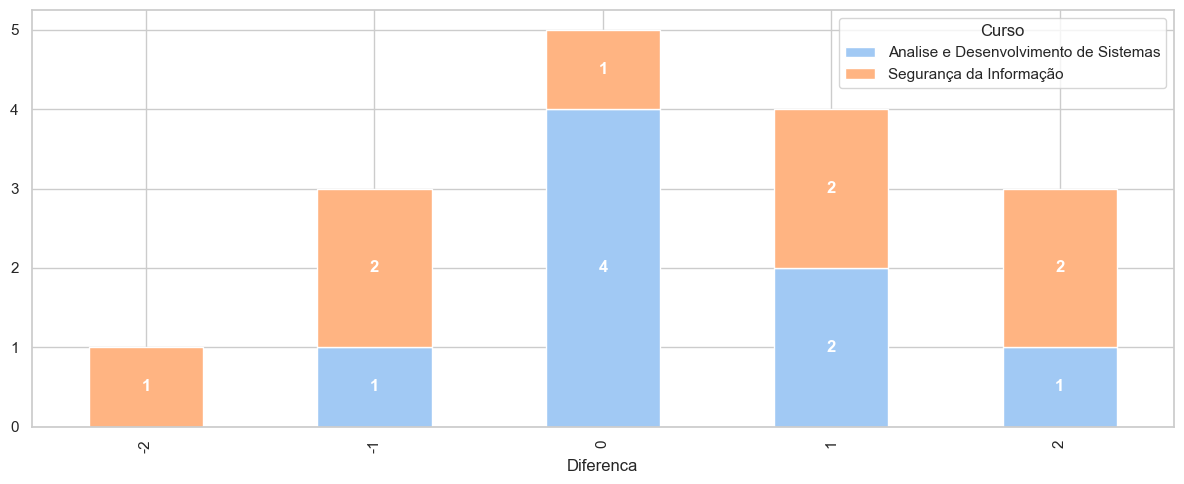

In [670]:
ax = pd.crosstab(index=juntos['Diferenca'], columns=juntos["Curso"]).plot(kind='bar', stacked=True, figsize=(12, 5))

# Adicionando os rótulos
for container in ax.containers:
    # Adiciona rótulo apenas se o valor for maior que 0
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                        ha='center', va='center', fontsize=12, color='white', weight='bold')

plt.tight_layout()
plt.show()

- uma pessoa de si diminuiu a pontuação em 2;
- 2 das 3 pessoas que diminuiram a pontuação em 1 eram de si;
- 4 das 5 pessoas que manteram a pontuação eram de ADS;
- 2 das 3 pessoas que aumentaram a pontuação eram de si

### Realizando o teste

Há uma diferença significativa entre as médias das duas condições(antes e depois do teste)?

- **H₀ (Hipótese Nula):** A média das diferenças entre os pares é zero (𝜇𝑑 = 0). Ou seja, não há impacto significativo do jogo nos acertos.
- **H₁ (Hipótese Alternativa):** A média das diferenças entre os pares é diferente de zero (𝜇𝑑 ≠ 0). Ou seja, o jogo teve um impacto nos acertos.

In [671]:
#teste t pareado
t_stat, p_value = stats.ttest_rel(juntos["Acertos_pos_jogo"], juntos["Acertos_pos_aula"])

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Rejeitamos a hipótese nula. Houve uma diferença significativa nos acertos antes e depois do jogo.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências de diferença significativa nos acertos antes e depois do jogo.")


t-statistic: 1.0456
p-value: 0.3123
Não rejeitamos a hipótese nula. Não há evidências de diferença significativa nos acertos antes e depois do jogo.


In [672]:
# impacto real do jogo, não apenas se há diferença.

diff = juntos["Acertos_pos_jogo"] - juntos["Acertos_pos_aula"]

cohen_d = np.mean(diff) / np.std(diff, ddof=1)
print(f"Tamanho do efeito (Cohen’s d): {cohen_d:.4f}")

Tamanho do efeito (Cohen’s d): 0.2614


Como o tamanho do efeito foi de 0.2614, isso significa que, mesmo que houvesse uma pequena diferença, o efeito é fraco, ou seja, o impacto prático é pequeno (o impacto do jogo no desempenho dos jogadores foi mínimo).

analisar o ira, achar uma maneira de identificar os participantes, p1, p2 etc

### Utilizando o wilcoxon

In [673]:
#teste t pareado
t_stat, p_value = stats.wilcoxon(juntos["Acertos_pos_jogo"], juntos["Acertos_pos_aula"])

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Rejeitamos a hipótese nula. Houve uma diferença significativa nos acertos antes e depois do jogo.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências de diferença significativa nos acertos antes e depois do jogo.")

t-statistic: 21.5000
p-value: 0.2903
Não rejeitamos a hipótese nula. Não há evidências de diferença significativa nos acertos antes e depois do jogo.


## Controle X Experimental

In [674]:
controle = pre_teste_df[~pre_teste_df["Qual o seu e-mail?"].isin(pos_teste_df["Qual o seu e-mail?"])].copy()
experimental = pos_teste_df.copy()

In [675]:
controle = controle.drop([2, 7, 19, 33], axis=0)

In [676]:
acertos_controle = get_acertos(controle)
# acertos_controle

In [677]:
acertos_experimental = get_acertos(experimental)
# acertos_experimental

In [678]:
media_controle = acertos_controle['Acertos'].mean()
media_experimental = acertos_experimental['Acertos'].mean()

print(f"Média do grupo controle: {media_controle:.2f}")
print(f"Média do grupo experimental: {media_experimental:.2f}")

Média do grupo controle: 10.12
Média do grupo experimental: 8.75


In [679]:
# consertando um erro de digitação
experimento.loc[experimento['Nome'] == 'Luis Carlos de Carvalho F. Filho', 'Faixa IRA'] = 'Baixo'

experimento['Nome'] = experimento['Nome'].str.strip().str.lower()
acertos_controle['Nome'] = acertos_controle['Nome'].str.strip().str.lower()
acertos_experimental['Nome'] = acertos_experimental['Nome'].str.strip().str.lower()


ira_controle = experimento.loc[experimento['Grupo'] == 'Controle'].sort_values(by='Nome')
ira_experimental = experimento.loc[experimento['Grupo'] == 'Experimental'].sort_values(by='Nome')

# ira_controle

In [680]:
# ira_experimental

### Análise do IRA

In [681]:
ira_controle['Faixa IRA'].value_counts()

Faixa IRA
Baixo    8
Alto     8
Name: count, dtype: int64

In [682]:
ira_experimental['Faixa IRA'].value_counts()

Faixa IRA
Baixo    8
Alto     8
Name: count, dtype: int64

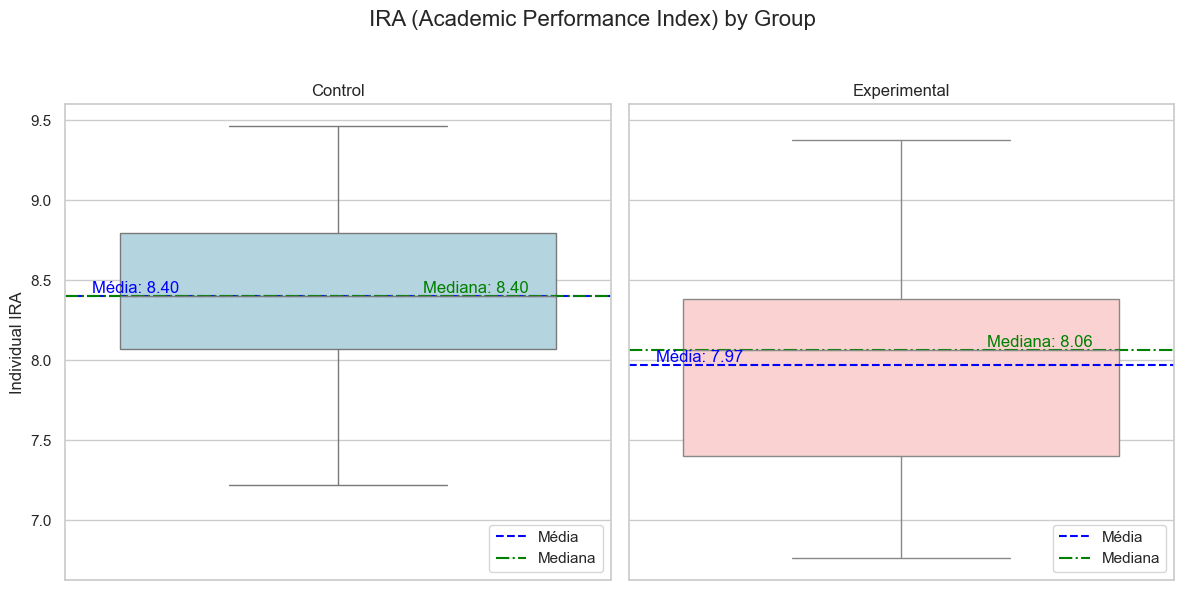

In [683]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Função para adicionar média e mediana
def add_stats(ax, data):
    mean = data['Nota do IRA Individual'].mean()
    median = data['Nota do IRA Individual'].median()
    
    ax.axhline(mean, color='blue', linestyle='--', linewidth=1.5, label='Média')
    ax.axhline(median, color='green', linestyle='-.', linewidth=1.5, label='Mediana')
    
    # Adiciona os textos em posições diferentes
    ax.text(0.05, mean, f'Média: {mean:.2f}', color='blue', va='bottom', ha='left', 
            transform=ax.get_yaxis_transform())
    ax.text(0.85, median, f'Mediana: {median:.2f}', color='green', va='bottom', ha='right', 
            transform=ax.get_yaxis_transform())

# Grupo controle
sns.boxplot(y='Nota do IRA Individual', data=ira_controle, ax=ax[0], color='#add8e6')
ax[0].set_title('Control')
add_stats(ax[0], ira_controle)

# Grupo experimental
sns.boxplot(y='Nota do IRA Individual', data=ira_experimental, ax=ax[1], color='#ffcccb')
ax[1].set_title('Experimental')
add_stats(ax[1], ira_experimental)

# Eixos e layout
for a in ax:
    a.set_ylabel('Individual IRA')
    a.set_xlabel('')
    a.legend(loc='lower right')

plt.suptitle('IRA (Academic Performance Index) by Group', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('ira_boxplot.pdf', dpi=300, bbox_inches='tight')
plt.show()


#### Verificando a normalidade

In [684]:
# controle
shapiro_test = stats.shapiro(acertos_controle['Acertos'])
print(f"Shapiro-Wilk p-valor (controle): {shapiro_test.pvalue:.4f}")

if shapiro_test.pvalue > 0.05:
    print("O grupo controle segue uma distribuição aproximadamente normal.")
else:
    print("O grupo controle não segue uma distribuição normal.")

shapiro_test = stats.shapiro(acertos_experimental['Acertos'])

print(f"Shapiro-Wilk p-valor (experimental): {shapiro_test.pvalue:.4f}")

if shapiro_test.pvalue > 0.05:
    print("O grupo experimental segue uma distribuição aproximadamente normal.")
else:
    print("O grupo experimental não segue uma distribuição normal.")

Shapiro-Wilk p-valor (controle): 0.0389
O grupo controle não segue uma distribuição normal.
Shapiro-Wilk p-valor (experimental): 0.3536
O grupo experimental segue uma distribuição aproximadamente normal.


- como um dus grupos não segue uma distribuição normal, usaremos um teste não paramétrico

Há uma diferença significativa entre as médias entre os grupos?

- **H₀ (Hipótese Nula):** A média das diferenças entre os grupos é zero (𝜇𝑑 = 0).
- **H₁ (Hipótese Alternativa):** A média das diferenças entre os grupos é diferente de zero (𝜇𝑑 ≠ 0).

In [685]:
u_stat, p_value = stats.mannwhitneyu(acertos_experimental['Acertos'], acertos_controle['Acertos'])

print(f"U-statistic: {u_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa entre as médias entre os grupos.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências de diferença significativa entre as médias entre os grupos.")

U-statistic: 83.0000
p-value: 0.0883
Não rejeitamos a hipótese nula. Não há evidências de diferença significativa entre as médias entre os grupos.


In [686]:
# Obtendo o valor Z
z_value = stats.norm.ppf(p_value / 2)

# Calculando r
N = len(acertos_controle) + len(acertos_experimental)
r = z_value / np.sqrt(N)

print(f"r de Rank-Biserial: {r:.3f}")

r de Rank-Biserial: -0.301


In [687]:
u_stat, _ = stats.mannwhitneyu(acertos_controle['Acertos'], acertos_experimental['Acertos'])
n1, n2 = len(experimental), len(controle)
r = 1 - (2 * u_stat) / (n1 * n2)  # positivo = experimental > controle

In [688]:
r

np.float64(-0.3515625)

## Gain Analysis

In [689]:
juntos['Normalized_Gain'] = (juntos['Acertos_pos_jogo'] - juntos['Acertos_pos_aula']) / (12 - juntos['Acertos_pos_aula'])

def ngain_map(x):
    if -1 <= x < 0:
        return "Decrease"
    elif x == 0:
        return "Stable"
    elif 0 < x < 0.3:
        return "Low"
    elif 0.3 <= x < 0.7:
        return "Average"
    elif 0.7 <= x <= 1:
        return "High"
    else:
        return "Out of Range"
    
juntos['Normalized_Gain_Interpretation'] = juntos['Normalized_Gain'].map(ngain_map)

In [690]:
juntos

,Nome,E-mail,Acertos_pos_aula,Acertos_pos_jogo,Diferenca,Curso,Nota do IRA Individual,Faixa IRA,Normalized_Gain,Normalized_Gain_Interpretation
0,aline kelly de sousa lima,liinekelly10@alu.ufc.br,9,9,0,Analise e Desenvolvimento de Sistemas,7.3467,Baixo,0.000000,Stable
1,cauã de sousa brandão,brandao@alu.ufc.br,3,3,0,Analise e Desenvolvimento de Sistemas,7.1080,Baixo,0.000000,Stable
2,cássio davi matos dos santos,cassiomatos@alu.ufc.br,6,7,1,Segurança da Informação,7.2827,Baixo,0.166667,Low
3,emanuel ávila cruz pires,emanuel.pires@alu.ufc.br,10,12,2,Segurança da Informação,7.4241,Baixo,1.000000,High
4,esdras souza dos santos,souzaesdras@alu.ufc.br,9,9,0,Analise e Desenvolvimento de Sistemas,8.4547,Alto,0.000000,Stable
5,francisco de paulo mesquita júnior,paulojr00@alu.ufc.br,10,9,-1,Segurança da Informação,8.3567,Alto,-0.500000,Decrease
6,gabriel felix oliveira,gofelix1616@alu.ufc.br,10,10,0,Analise e Desenvolvimento de Sistemas,8.6633,Alto,0.000000,Stable
7,italo césar sampaio gomes pinto,italo.csr07@alu.ufc.br,8,8,0,Segurança da Informação,8.2867,Alto,0.000000,Stable
8,josé davi araujo gomes,jose.davi@alu.ufc.br,7,8,1,Analise e Desenvolvimento de Sistemas,7.6987,Baixo,0.200000,Low
9,josé eric mesquita coelho,ericmesquita2480@alu.ufc.br,11,12,1,Analise e Desenvolvimento de Sistemas,9.3787,Alto,1.000000,High


In [691]:
juntos.groupby('Faixa IRA')['Normalized_Gain_Interpretation'].value_counts().to_frame()

count
Faixa IRA Normalized_Gain_Interpretation       
Alto      Decrease                            3
          Stable                              3
          Average                             1
          High                                1
Baixo     Average                             2
          Low                                 2
          Stable                              2
          Decrease                            1
          High                                1

In [692]:
nomes = juntos.Nome.tolist()
nomes.append('gabriel felix olivera'.lower().strip())
nomes.append('Pâmela Gonçalves Uchôa de Sousa'.lower().strip())

caracterizacao_exp = caracterizacao[caracterizacao['Qual o seu nome?'].str.lower().str.strip().isin(nomes)].copy()

In [693]:
caracterizacao_exp['level'] = caracterizacao_exp['Como você autoavalia seu nível de conhecimento em segurança de software (ou informação)?'].map(question_map)
caracterizacao_exp

,Carimbo de data/hora,Qual o seu nome?,Qual o seu e-mail?,Qual a sua idade?,Qual é o seu gênero?,Qual é o seu curso de graduação?,Em qual semestre/período acadêmico você está atualmente?,Você trabalha atualmente na indústria de software ou em projetos de pesquisa e desenvolvimento (P&D) na área?,Como você autoavalia seu nível de conhecimento em desenvolvimento de sistemas para web?,Como você autoavalia seu nível de conhecimento em segurança de software (ou informação)?,Como você autoavalia seu nível de conhecimento em vulnerabilidades de segurança para sistemas web?,Como você autoavalia seu nível de conhecimento em padrões de segurança para mitigar vulnerabilidades em sistemas web?,level
2,2025-02-22 15:48:11.152,José Eric Mesquita Coelho,ericmesquita2480@alu.ufc.br,20,Homem,Analise e Desenvolvimento de Sistemas,6º semestre/período,"Sim, em projetos de pesquisa e desenvolvimento",Eu participei de exercícios práticos em sala de aula.,Eu tive aulas sobre isso.,Eu realizei pesquisas prévias em fontes da literatura e recursos online.,Eu realizei pesquisas prévias em fontes da literatura e recursos online.,Medium
3,2025-02-22 15:48:21.821,Cauã de Sousa Brandão,Brandao@alu.ufc.br,21,Homem,Analise e Desenvolvimento de Sistemas,6º semestre/período,Não,Eu participei de exercícios práticos em sala de aula.,Eu tive aulas sobre isso.,Eu tive aulas sobre isso.,Eu não tenho familiaridade prévia com isso.,Medium
4,2025-02-22 15:48:30.478,Aline Kelly de Sousa Lima,liinekelly10@alu.ufc.br,20,Mulher,Analise e Desenvolvimento de Sistemas,4º semestre/período,Não,Eu participei de exercícios práticos em sala de aula.,Eu participei de exercícios práticos em sala de aula.,Eu tive aulas sobre isso.,Eu tive aulas sobre isso.,Medium
6,2025-02-22 15:49:34.712,Francisco de Paulo Mesquita Júnior,paulojr00@alu.ufc.br,24,Homem,Segurança da Informação,4º semestre/período,Não,Eu não tenho familiaridade prévia com isso.,Eu realizei pesquisas prévias em fontes da literatura e recursos online.,Eu realizei pesquisas prévias em fontes da literatura e recursos online.,Eu realizei pesquisas prévias em fontes da literatura e recursos online.,Medium
7,2025-02-22 15:52:57.178,Willian Mota Sousa,willyanmota93@gmail.com,20,Homem,Segurança da Informação,4º semestre/período,Não,Eu não tenho familiaridade prévia com isso.,Eu tive aulas sobre isso.,Eu tive aulas sobre isso.,Eu tive aulas sobre isso.,Medium
10,2025-02-22 15:59:05.290,Paulo Matheus Cardoso Viana,paulo.cardoso@alu.ufc.br,20,Homem,Analise e Desenvolvimento de Sistemas,4º semestre/período,Não,Eu tive aulas sobre isso.,Eu não tenho familiaridade prévia com isso.,Eu não tenho familiaridade prévia com isso.,Eu tive aulas sobre isso.,Low
12,2025-02-22 16:03:45.361,Emanuel Ávila Cruz Pires,emanuel.pires@alu.ufc.br,22,Homem,Segurança da Informação,6º semestre/período,"Sim, em projetos de pesquisa e desenvolvimento",Eu participei de exercícios práticos em sala de aula.,Eu participei de exercícios práticos em sala de aula.,Eu participei de exercícios práticos em sala de aula.,Eu participei de exercícios práticos em sala de aula.,Medium
15,2025-02-22 16:11:11.972,Cássio Davi Matos dos Santos,cassiomatos@alu.ufc.br,21,Homem,Segurança da Informação,6º semestre/período,Não,Eu participei de exercícios práticos em sala de aula.,Eu participei de exercícios práticos em sala de aula.,Eu participei de exercícios práticos em sala de aula.,Eu participei de exercícios práticos em sala de aula.,Medium
17,2025-02-22 16:13:23.128,Vitor Emanuel de Sousa Nunes,sousavitim@alu.ufc.br,22,Homem,Segurança da Informação,4º semestre/período,Não,Eu não tenho familiaridade prévia com isso.,Eu tive aulas sobre isso.,Eu tive aulas sobre isso.,Eu tive aulas sobre isso.,Medium
22,2025-02-22 16:31:55.412,Esdras Souza dos Santos,souzaesdras@alu.ufc.br,22,Homem,Analise e Desenvolvimento de Sistemas,6º semestre/período,Não,Eu participei de exercícios práticos em sala de aula.,Eu tive aulas sobre isso.,Eu não tenho familiaridade prévia com isso.,Eu realizei

In [694]:
caracterizacao_exp['Como você autoavalia seu nível de conhecimento em segurança de software (ou informação)?'].value_counts()

Como você autoavalia seu nível de conhecimento em segurança de software (ou informação)?
Eu tive aulas sobre isso.                                                   9
Eu participei de exercícios práticos em sala de aula.                       5
Eu realizei pesquisas prévias em fontes da literatura e recursos online.    1
Eu não tenho familiaridade prévia com isso.                                 1
Name: count, dtype: int64

In [710]:
gain_exp = pd.merge(
    juntos[["E-mail", "Normalized_Gain"]],
    caracterizacao_exp[["Qual o seu e-mail?", "Como você autoavalia seu nível de conhecimento em segurança de software (ou informação)?"]],
    left_on="E-mail",
    right_on="Qual o seu e-mail?",
    how="inner" 
).drop(columns=["Qual o seu e-mail?"]) 

In [711]:
gain_exp

,E-mail,Normalized_Gain,Como você autoavalia seu nível de conhecimento em segurança de software (ou informação)?
0,liinekelly10@alu.ufc.br,0.000000,Eu participei de exercícios práticos em sala de aula.
1,cassiomatos@alu.ufc.br,0.166667,Eu participei de exercícios práticos em sala de aula.
2,emanuel.pires@alu.ufc.br,1.000000,Eu participei de exercícios práticos em sala de aula.
3,souzaesdras@alu.ufc.br,0.000000,Eu tive aulas sobre isso.
4,paulojr00@alu.ufc.br,-0.500000,Eu realizei pesquisas prévias em fontes da literatura e recursos online.
5,gofelix1616@alu.ufc.br,0.000000,Eu tive aulas sobre isso.
6,italo.csr07@alu.ufc.br,0.000000,Eu tive aulas sobre isso.
7,jose.davi@alu.ufc.br,0.200000,Eu participei de exercícios práticos em sala de aula.
8,ericmesquita2480@alu.ufc.br,1.000000,Eu tive aulas sobre isso.
9,paulo.cardoso@alu.ufc.br,-0.200000,Eu não tenho familiaridade prévia com isso.


In [697]:
def level_map(x):
    if x == 'Eu tive aulas sobre isso.':
        return 'Medium'
    elif x == 'Eu participei de exercícios práticos em sala de aula.':
        return 'Medium-High'
    elif x == 'Eu realizei pesquisas prévias em fontes da literatura e recursos online.':
        return 'Medium-Low'
    elif x == 'Eu não tenho familiaridade prévia com isso.':
       return 'Low'
    elif x == 'Eu apliquei isso em um projeto industrial.':
       return 'High' 


In [698]:
def categorias_map(x):
    if x in [
        'Eu não tenho familiaridade prévia com isso.',
        'Eu realizei pesquisas prévias em fontes da literatura e recursos online.',
        'Eu tive aulas sobre isso.'
    ]:
        return 'Less-experienced'
    elif x in [
        'Eu participei de exercícios práticos em sala de aula.',
        'Eu apliquei isso em um projeto industrial.'
    ]:
        return 'More-experienced'
    else:
        return None


In [699]:
pd.set_option('display.max_colwidth', None) 

#gain_exp['level'] = gain_exp[
    #'Como você autoavalia seu nível de conhecimento em segurança de software (ou informação)?'
#].map(level_map)

gain_exp['categories'] = gain_exp[
    'Como você autoavalia seu nível de conhecimento em segurança de software (ou informação)?'
].map(categorias_map)
gain_exp

,E-mail,Normalized_Gain,Como você autoavalia seu nível de conhecimento em segurança de software (ou informação)?,categories
0,liinekelly10@alu.ufc.br,0.000000,Eu participei de exercícios práticos em sala de aula.,More-experienced
1,cassiomatos@alu.ufc.br,0.166667,Eu participei de exercícios práticos em sala de aula.,More-experienced
2,emanuel.pires@alu.ufc.br,1.000000,Eu participei de exercícios práticos em sala de aula.,More-experienced
3,souzaesdras@alu.ufc.br,0.000000,Eu tive aulas sobre isso.,Less-experienced
4,paulojr00@alu.ufc.br,-0.500000,Eu realizei pesquisas prévias em fontes da literatura e recursos online.,Less-experienced
5,gofelix1616@alu.ufc.br,0.000000,Eu tive aulas sobre isso.,Less-experienced
6,italo.csr07@alu.ufc.br,0.000000,Eu tive aulas sobre isso.,Less-experienced
7,jose.davi@alu.ufc.br,0.200000,Eu participei de exercícios práticos em sala de aula.,More-experienced
8,ericmesquita2480@alu.ufc.br,1.000000,Eu tive aulas sobre isso.,Less-experienced
9,paulo.cardoso@alu.ufc.br,-0.200000,Eu não tenho familiaridade prévia com isso.,Less-experienced


Verificando a normalidade

In [ ]:
less = gain_exp[gain_exp['categories'] == 'Less-experienced']['Normalized_Gain']
more = gain_exp[gain_exp['categories'] == 'More-experienced']['Normalized_Gain']

# Teste de normalidade para o grupo Less-experienced
shapiro_less = stats.shapiro(less)
print(f"Shapiro-Wilk p-valor (Less-experienced): {shapiro_less.pvalue:.4f}")
if shapiro_less.pvalue > 0.05:
    print("O grupo Less-experienced segue uma distribuição aproximadamente normal.")
else:
    print("O grupo Less-experienced não segue uma distribuição normal.")

# Teste de normalidade para o grupo More-experienced
shapiro_more = stats.shapiro(more)
print(f"Shapiro-Wilk p-valor (More-experienced): {shapiro_more.pvalue:.4f}")
if shapiro_more.pvalue > 0.05:
    print("O grupo More-experienced segue uma distribuição aproximadamente normal.")
else:
    print("O grupo More-experienced não segue uma distribuição normal.")


Shapiro-Wilk p-valor (Less-experienced): 0.6136
O grupo Less-experienced segue uma distribuição aproximadamente normal.
Shapiro-Wilk p-valor (More-experienced): 0.4093
O grupo More-experienced segue uma distribuição aproximadamente normal.


- como os dois grupos seguem uma distribuição normal, usaremos um teste t

Há uma diferença significativa entre as médias entre os grupos?

- **Hipótese Nula (H₀):**  
  O ganho médio (*Normalized_Gain*) dos grupos *Less-experienced* e *More-experienced* é igual.  
  $$
  H_0: \mu_{Less} = \mu_{More}
  $$

- **Hipótese Alternativa (H₁):**  
  O ganho médio (*Normalized_Gain*) dos grupos *Less-experienced* e *More-experienced* é diferente.  
  $$
  H_1: \mu_{Less} \neq \mu_{More}
  $$

Responde mais indiretamente


In [ ]:
print("less:", less.mean())
print("more:", more.mean())

less: 0.055000000000000014
more 0.4066666666666666


In [ ]:
# Teste t  (Less-experienced vs More-experienced)
t_stat, p_value = stats.ttest_ind(less, more, equal_var=False)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Rejeitamos a hipótese nula. Há diferença significativa no nível de conhecimento entre os grupos Less-experienced e More-experienced.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências de diferença significativa no nível de conhecimento entre os grupos Less-experienced e More-experienced.")


t-statistic: -1.4168
p-value: 0.1867
Não rejeitamos a hipótese nula. Não há evidências de diferença significativa no nível de conhecimento entre os grupos Less-experienced e More-experienced.


In [702]:
# Tamanho do efeito (Cohen's d)
n1, n2 = len(less), len(more)
s1, s2 = np.std(less, ddof=1), np.std(more, ddof=1)
mean1, mean2 = np.mean(less), np.mean(more)

# Desvio padrão combinado (pooled)
s_pooled = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))

# Cohen's d
cohen_d = (mean1 - mean2) / s_pooled
print(f"Cohen's d: {cohen_d:.4f}")

Cohen's d: -0.7148


Como o tamanho do efeito foi de Cohen's d = -0.7148, isso indica que há uma diferença moderada a grande entre os grupos. O sinal negativo mostra que o grupo More-experienced teve desempenho maior que o Less-experienced em termos de aprendizado. Em outras palavras, o nível prévio de experiência influencia o ganho de aprendizado com o jogo — jogadores mais experientes se beneficiaram mais.

Pessoas com menos experiência aprenderam mais que pessoas com mais experiência?

- **Hipótese Nula (H₀):**  
  O ganho médio (*Normalized_Gain*) do grupo *Less-experienced* é menor ou igual ao do grupo *More-experienced*.  
  $$
  H_0: \mu_{Less} \leq \mu_{More}
  $$

- **Hipótese Alternativa (H₁):**  
  O ganho médio (*Normalized_Gain*) do grupo *Less-experienced* é maior que o do grupo *More-experienced*.  
  $$
  H_1: \mu_{Less} > \mu_{More}
  $$

**Nota:** Este é um teste t unilateral, pois a hipótese tem direção específica.


In [703]:
# Teste t unilateral (Less-experienced > More-experienced)
t_stat, p_value_two_sided = stats.ttest_ind(less, more, equal_var=False)

# Para teste unilateral, dividimos o p-valor de duas caudas
p_value_one_sided = p_value_two_sided / 2

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value (unilateral): {p_value_one_sided:.4f}")

if t_stat > 0 and p_value_one_sided < 0.05:
    print("Rejeitamos a hipótese nula. Pessoas com menos experiência aprenderam mais que as com mais experiência.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências de que pessoas com menos experiência aprenderam mais que as com mais experiência.")

t-statistic: -1.4168
p-value (unilateral): 0.0934
Não rejeitamos a hipótese nula. Não há evidências de que pessoas com menos experiência aprenderam mais que as com mais experiência.


In [704]:
# Tamanho do efeito (Cohen's d)
n1, n2 = len(less), len(more)
s1, s2 = np.std(less, ddof=1), np.std(more, ddof=1)
mean1, mean2 = np.mean(less), np.mean(more)

# Desvio padrão combinado (pooled)
s_pooled = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))

# Cohen's d
cohen_d = (mean1 - mean2) / s_pooled
print(f"Cohen's d: {cohen_d:.4f}")

Cohen's d: -0.7148


Como o tamanho do efeito foi de Cohen's d = -0.7148, isso indica que há uma diferença moderada a grande entre os grupos. O sinal negativo mostra que o grupo More-experienced teve desempenho maior que o Less-experienced em termos de aprendizado. Em outras palavras, o nível prévio de experiência influencia o ganho de aprendizado com o jogo — jogadores mais experientes se beneficiaram mais.

Pelo IRA

In [705]:
# Separando os grupos a partir da tabela
baixo = juntos[juntos['Faixa IRA'] == 'Baixo']['Normalized_Gain']
alto = juntos[juntos['Faixa IRA'] == 'Alto']['Normalized_Gain']

# Teste de normalidade para o grupo IRA Baixo
shapiro_less = stats.shapiro(baixo)
print(f"Shapiro-Wilk p-valor (IRA Baixo): {shapiro_less.pvalue:.4f}")
if shapiro_less.pvalue > 0.05:
    print("O grupo IRA Baixo segue uma distribuição aproximadamente normal.")
else:
    print("O grupo IRA Baixo não segue uma distribuição normal.")

# Teste de normalidade para o grupo IRA Alto
shapiro_more = stats.shapiro(alto)
print(f"Shapiro-Wilk p-valor (IRA Alto): {shapiro_more.pvalue:.4f}")
if shapiro_more.pvalue > 0.05:
    print("O grupo IRA Alto segue uma distribuição aproximadamente normal.")
else:
    print("O grupo IRA Alto não segue uma distribuição normal.")


Shapiro-Wilk p-valor (IRA Baixo): 0.6031
O grupo IRA Baixo segue uma distribuição aproximadamente normal.
Shapiro-Wilk p-valor (IRA Alto): 0.4366
O grupo IRA Alto segue uma distribuição aproximadamente normal.


In [715]:
print(f"IRA Baixo:{baixo.mean()}")
print(f"IRA Alto:{alto.mean()}")

IRA Baixo:0.29166666666666663
IRA Alto:0.03125


Hipóteses para o Teste t sobre o Gain (IRA)

- **Hipótese Nula (H₀):**  
  Não há diferença no **ganho médio** (IRA) entre os grupos.  

  $$H_0: \mu_{\text{baixo}} = \mu_{\text{alto}}$$

- **Hipótese Alternativa (H₁):**  
  Há diferença no **ganho médio** entre os grupos.  

  $$H_1: \mu_{\text{baixo}} \neq \mu_{\text{alto}}$$


In [706]:
# Teste t para duas amostras independentes
t_stat, p_value = stats.ttest_ind(baixo, alto, equal_var=False)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Rejeitamos a hipótese nula (H₀). Há diferença significativa no ganho médio (IRA) entre os grupos.")
else:
    print("Não rejeitamos a hipótese nula (H₀). Não há evidências de diferença significativa no ganho médio (IRA) entre os grupos.")

t-statistic: 1.0703
p-value: 0.3044
Não rejeitamos a hipótese nula (H₀). Não há evidências de diferença significativa no ganho médio (IRA) entre os grupos.


In [707]:
# Tamanho do efeito (Cohen's d)
n1, n2 = len(baixo), len(alto)
s1, s2 = np.std(baixo, ddof=1), np.std(alto, ddof=1)
mean1, mean2 = np.mean(baixo), np.mean(alto)

# Desvio padrão combinado (pooled)
s_pooled = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))

# Cohen's d
cohen_d = (mean1 - mean2) / s_pooled
print(f"Cohen's d: {cohen_d:.4f}")

Cohen's d: 0.5351


Como o tamanho do efeito foi de Cohen's d = 0.5351, isso indica que há uma diferença moderada no ganho médio (IRA) entre os grupos. O valor positivo mostra que o grupo com IRA Alto obteve ganho médio maior que o grupo baixo. Em outras palavras, o nível do IRA associado influencia o desempenho, e o impacto prático é moderado, sugerindo que as diferenças observadas no IRA são relevantes, mas não extremamente grandes.